# Reading Data

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv("Emotion_Databases.csv")

In [48]:
data.head()

,File Name,Emotion,MFCC Mean,MFCC Standard deviation,Croma Mean,Chroma Standard deviation,MEL Mean,MEL Standard deviation
0,03-01-01-01-01-01-01.wav,neutral,113.995018,-17.983574,0.272483,0.675760,0.040853,0.003970
1,03-01-01-01-01-02-01.wav,neutral,112.260872,-17.682295,0.218568,0.725722,0.047049,0.004594
2,03-01-01-01-02-01-01.wav,neutral,111.574677,-17.600674,0.208594,0.728253,0.063881,0.006346
3,03-01-01-01-02-02-01.wav,neutral,110.698242,-17.382687,0.193784,0.747211,0.061945,0.005832
4,03-01-02-01-01-01-01.wav,calm,115.860268,-18.125637,0.227840,0.699711,0.023791,0.002190


In [49]:
data["Emotion"].unique()

array(['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust',
       'surprised', 'boredom'], dtype=object)

In [50]:
emotions = {'neutral': 0, 
            'calm': 1, 
            'happy': 2, 
            'sad': 3, 
            'angry': 4, 
            'fearful': 5, 
            'disgust': 6,
            'surprised': 7, 
            'boredom': 8}

In [51]:
data["Emotion"] = data["Emotion"].map(emotions)

In [52]:
data.shape

(2455, 8)

In [53]:
data["File Name"].nunique()

2095

Name does not affect on data

In [77]:
data.corr()

,Emotion,MFCC Mean,MFCC Standard deviation,Croma Mean,Chroma Standard deviation,MEL Mean,MEL Standard deviation
Emotion,1.000000,-0.158380,0.047970,0.023088,-0.034555,0.097956,0.095375
MFCC Mean,-0.158380,1.000000,-0.872719,0.116241,0.356299,-0.528086,-0.619319
MFCC Standard deviation,0.047970,-0.872719,1.000000,-0.256225,-0.174850,0.568474,0.640418
Croma Mean,0.023088,0.116241,-0.256225,1.000000,-0.775690,0.080501,0.042860
Chroma Standard deviation,-0.034555,0.356299,-0.174850,-0.775690,1.000000,-0.278135,-0.311823
MEL Mean,0.097956,-0.528086,0.568474,0.080501,-0.278135,1.000000,0.969048
MEL Standard deviation,0.095375,-0.619319,0.640418,0.042860,-0.311823,0.969048,1.000000


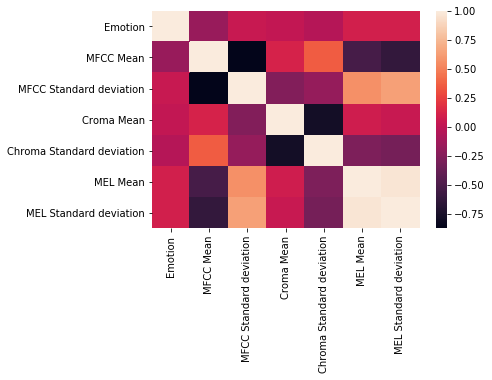

In [75]:
sns.heatmap(data.corr())

In [54]:
names = data["File Name"]
data = data.drop("File Name", axis = 1)
data

,Emotion,MFCC Mean,MFCC Standard deviation,Croma Mean,Chroma Standard deviation,MEL Mean,MEL Standard deviation
0,0,113.995018,-17.983574,0.272483,0.675760,0.040853,0.003970
1,0,112.260872,-17.682295,0.218568,0.725722,0.047049,0.004594
2,0,111.574677,-17.600674,0.208594,0.728253,0.063881,0.006346
3,0,110.698242,-17.382687,0.193784,0.747211,0.061945,0.005832
4,1,115.860268,-18.125637,0.227840,0.699711,0.023791,0.002190
...,...,...,...,...,...,...,...
2450,7,100.367325,-9.399616,0.267632,0.647229,0.434254,0.023873
2451,7,96.449471,-9.660956,0.265470,0.621995,0.526482,0.024304
2452,7,99.923615,-10.737567,0.280428,0.595984,0.524668,0.033549
2453,7,96.282051,-10.374496,0.261964,0.627558,0.687390,0.034079


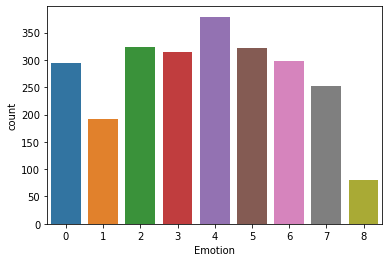

In [55]:
sns.countplot(data["Emotion"]);

###### "Stubborn" people is the least group. Nothing interesting

# TSNE

In [56]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
tsne = TSNE(n_components = 2, random_state = 11)

In [57]:
tsne_repr = tsne.fit_transform(StandardScaler().fit_transform(data))

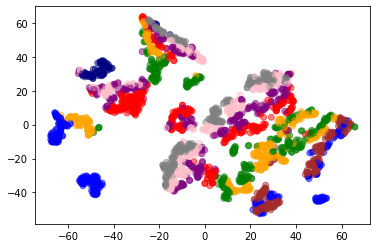

In [58]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c = data['Emotion'].map({0: "blue", 1: "brown", 2: "orange", 3: "green", 4: "red",
                                    5: "purple", 6: "pink", 7: "grey", 8: "navy"}), alpha=.5);

###### Thought: Logistic Regression will not work judjing by the plot above. Also, do not expect Random Forest to work. 

# Checking by features

### MFCC Mean

In [59]:
df = data.copy()    ## creating new dataset object not to add changes to object "data" 

In [60]:
np.sort(df["MFCC Mean"].unique())

array([ 24.16521645,  29.35872078,  29.72833061, ..., 130.87402344,
       132.42202759, 135.8145752 ])

In [61]:
df.loc[df["MFCC Mean"] < 30, "MFCC Mean"] = 29
df.loc[df["MFCC Mean"] >= 120, "MFCC Mean"] = 121

In [62]:
for value in range(30, 120, 10):
    df.loc[((df["MFCC Mean"] >= value) & (df["MFCC Mean"] < value + 10)), "MFCC Mean"] = value + 9

In [63]:
df.head()

,Emotion,MFCC Mean,MFCC Standard deviation,Croma Mean,Chroma Standard deviation,MEL Mean,MEL Standard deviation
0,0,119.0,-17.983574,0.272483,0.675760,0.040853,0.003970
1,0,119.0,-17.682295,0.218568,0.725722,0.047049,0.004594
2,0,119.0,-17.600674,0.208594,0.728253,0.063881,0.006346
3,0,119.0,-17.382687,0.193784,0.747211,0.061945,0.005832
4,1,119.0,-18.125637,0.227840,0.699711,0.023791,0.002190


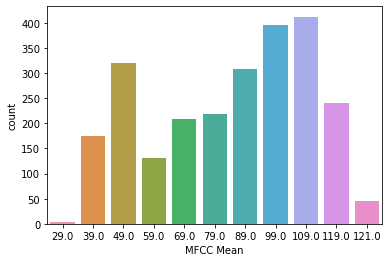

In [64]:
sns.countplot(df["MFCC Mean"]);

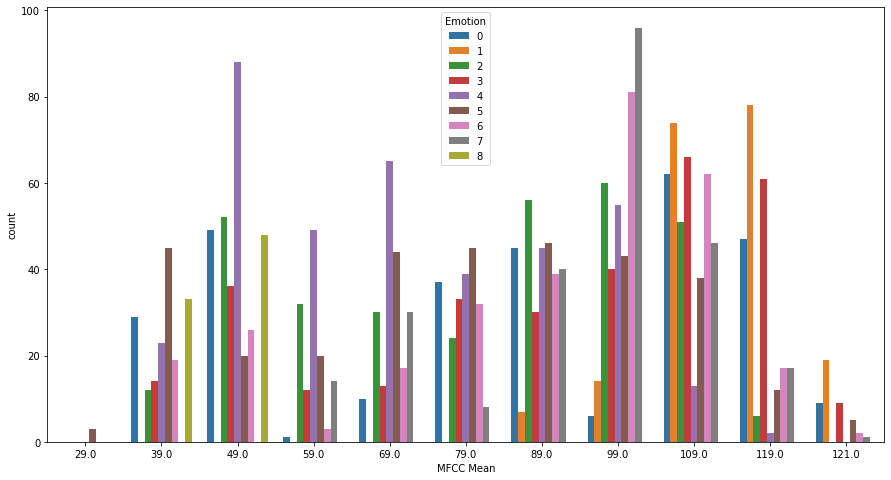

In [65]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df, x = "MFCC Mean", hue = "Emotion");

###### Nothing interesting

# MFCC Standard deviation

In [66]:
df.loc[df["MFCC Standard deviation"] < -20, "MFCC Standard deviation"] = -21
df.loc[df["MFCC Standard deviation"] >= 0, "MFCC Standard deviation"] = 2
for value in range(-20, 0, 2):
    df.loc[((df["MFCC Standard deviation"] >= value) & (df["MFCC Standard deviation"] < value + 2)), \
               "MFCC Standard deviation"] = value + 1

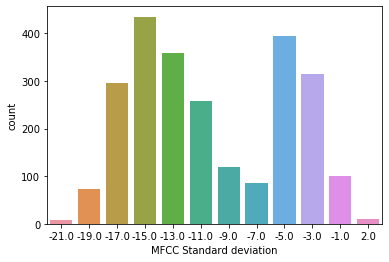

In [67]:
sns.countplot(df["MFCC Standard deviation"]);

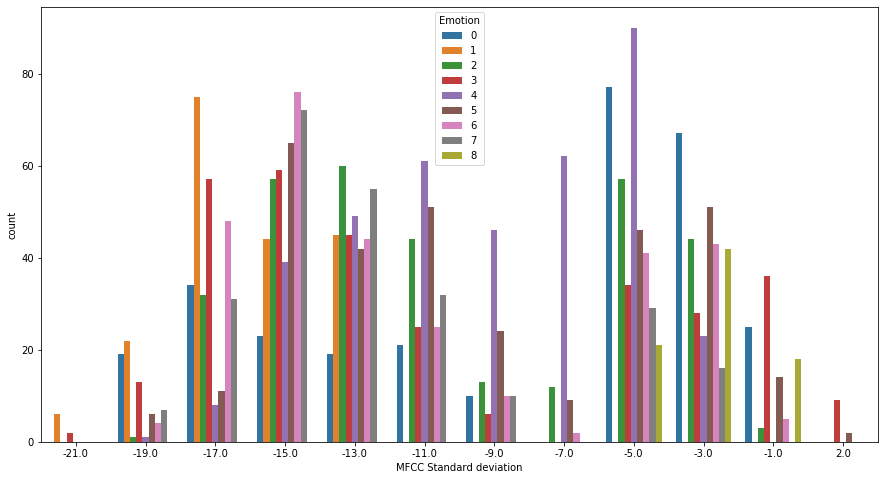

In [68]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df, x = "MFCC Standard deviation", hue = "Emotion");

# Croma Mean

In [69]:
np.sort(df["Croma Mean"].unique())

array([0.16710134, 0.17746711, 0.17976539, ..., 0.38109297, 0.38157585,
       0.38363111])

In [70]:
df.loc[df["Croma Mean"] < 0.19, "Croma Mean"] = 0.18
df.loc[df["Croma Mean"] >= 0.35, "Croma Mean"] = 0.36
value = -0.19
while value < 0.36:
    df.loc[((df["Croma Mean"] >= value) & (df["Croma Mean"] < value + 0.02)), \
               "Croma Mean"] = round(value + 0.01, 2)
    value += 0.02

In [71]:
np.sort(df["Croma Mean"].unique())

array([0.18, 0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36])

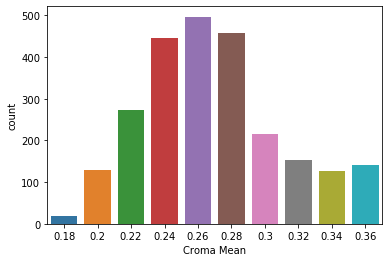

In [72]:
sns.countplot(df["Croma Mean"])

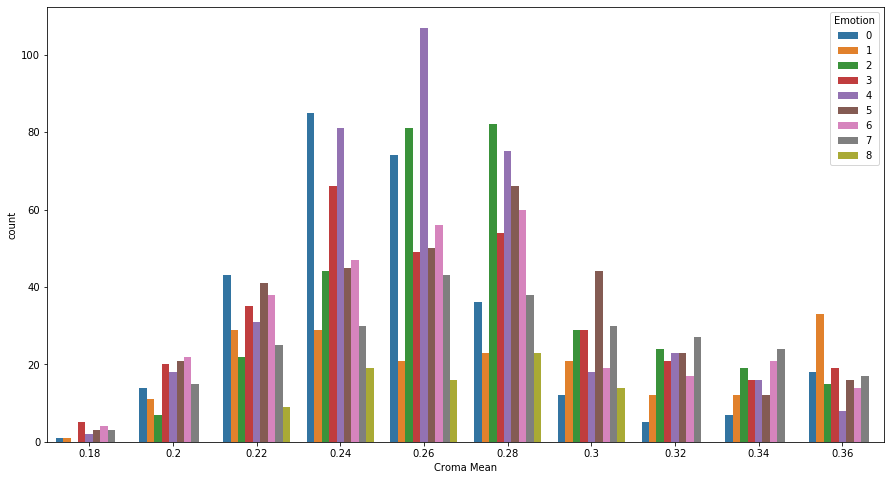

In [73]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df, x = "Croma Mean", hue = "Emotion");